# Fordbikego Data Exploration 
## by Muxin Hua

## Preliminary Wrangling

> This document explores satasets of a bik-shering system for 1,863,721 entries of records. 

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [7]:
fordgobike =  pd.read_csv(r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2017-fordgobike-tripdata.csv\2017-fordgobike-tripdata.csv')

In [8]:
fordgobike.shape

(519700, 13)

In [9]:
fordgobike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object

In [10]:
fordgobike['date'] = [i[0] for i in fordgobike['start_time'].str.split(' ')]
fordgobike['hour'] = [i[1].split(':')[0] for i in fordgobike['start_time'].str.split(' ')]

In [11]:
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,date,hour
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,2017-12-31,16
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,2017-12-31,15
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,2017-12-31,22
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,2017-12-31,17
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,2017-12-31,14


#### Wrangle 2018 and 2019 data for future analysis
Concat data of months in 2018 and 2019 forming a 2018 and 2019data, **fordgobike_18**,**fordgobike_19**. I also did some cleaning to make it tidy for future analysis.

In [12]:
fordgobike_18 = pd.read_csv(r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2018\201801-fordgobike-tripdata.csv')
months_18 = ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for month in months_18:
    month_path = r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2018\2018'+ month + '-fordgobike-tripdata.csv'
    f = pd.read_csv(month_path)
    fordgobike_18 = pd.concat([fordgobike_18,f])

In [13]:
fordgobike_19 = pd.read_csv(r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2019\201901-fordgobike-tripdata.csv')
ford_19 = ['02', '03', '04']

for month in ford_19:
    month_path = r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2019\2019'+ month + '-fordgobike-tripdata.csv'
    f = pd.read_csv(month_path)
    fordgobike_19 = pd.concat([fordgobike_19,f])

bay_19 = ['201905-baywheels-tripdata.csv','201906-baywheels-tripdata.csv','201907-baywheels-tripdata.csv'
          ,'201908-baywheels-tripdata.csv','201909-baywheels-tripdata.csv','201910-baywheels-tripdata.csv'
          ,'201911-baywheels-tripdata.csv','201912-baywheels-tripdata.csv']
for rest in bay_19:
    b_path = r'C:\Users\HUA\Desktop\Mini program\Project5\proj\2019\\' + rest
    f = pd.read_csv(b_path)
    fordgobike_19 = pd.concat([fordgobike_19,f])

C:\Users\HUA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\HUA\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
C:\Users\HUA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\HUA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtyp

In [14]:
fordgobike_18['date'] = [i[0] for i in fordgobike_18['start_time'].str.split(' ')]
fordgobike_18['hour'] = [i[1].split(':')[0] for i in fordgobike_18['start_time'].str.split(' ')]

fordgobike_19['date'] = [i[0] for i in fordgobike_19['start_time'].str.split(' ')]
fordgobike_19['hour'] = [i[1].split(':')[0] for i in fordgobike_19['start_time'].str.split(' ')]

In [15]:
fordgobike_18.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,date,hour
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,2018-01-31,22
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,2018-01-31,16
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,2018-01-31,14
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,2018-01-31,14
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,2018-01-31,19


In [16]:
fordgobike_19.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,date,hour
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber,2019-01-31,17
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber,2019-01-31,20
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer,2019-01-31,18
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer,2019-01-31,19
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer,2019-01-31,14


In [17]:
fordgobike['month'] = [mo[1] for mo in fordgobike['date'].str.split('-')]
fordgobike_18['month'] = [mo[1] for mo in fordgobike_18['date'].str.split('-')]
fordgobike_19['month'] = [mo[1] for mo in fordgobike_19['date'].str.split('-')]

In [18]:
fordgobike_18.shape

(1863721, 17)

In [19]:
fordgobike_19.shape

(2506983, 18)

In [20]:
fordgobike_18['user_type'].value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [21]:
fordgobike_19['user_type'].value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

### What is the structure of your dataset?

> There are 519700 entries in the dataset **fordbygo** in 2017, 1863721 in the dataset **fordbygo_2018** and 2021166 in the dataset **fordbygo_2019**. All of them have 13 features: 'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'bike_share_for_all_trip'. Most variables are numerical in nature except start_station_name ,end_station_name and user_type. Considering these datasets come from California only, I care more about thr categorical variable: *user_type*, which could be Subscriber or Customer.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in what variable has effect on the overall trending for a specific year, so I'll focus mostly on 2018 and 2019 data considering incompleteness of 2017 dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'm expecting seasons and hours have impact on the result: cold winter could result in less bike travels, rush hours could lead to higher demand for bikes.

## Univariate Exploration

> I'll start by looking at the overall monthly, hourly distribution.

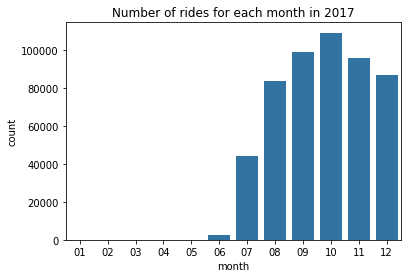

In [22]:
months = ['01','02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
sb.countplot(data=fordgobike
             ,x='month'
             ,order=months
             ,color=sb.color_palette()[0]);
plt.title('Number of rides for each month in 2017');

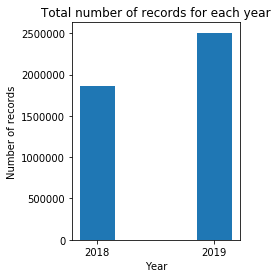

In [23]:
#user growth
user_growth = (fordgobike_18.shape[0], fordgobike_19.shape[0])
figure = plt.figure(figsize=(3,4))
plt.bar(['2018', '2019'],
       user_growth
       ,width=0.3);
plt.ylabel('Number of records');
plt.xlabel('Year');
plt.title('Total number of records for each year');

In [24]:
(fordgobike_19.shape[0]-fordgobike_18.shape[0])/fordgobike_18.shape[0]

0.3451493007805353

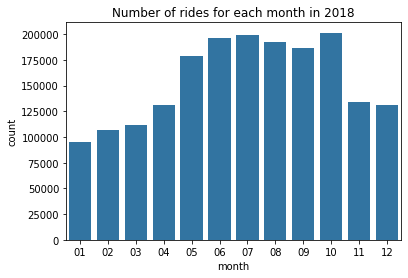

In [25]:
sb.countplot(data=fordgobike_18
             ,x='month'
             ,order=months
             ,color=sb.color_palette()[0]);
plt.title('Number of rides for each month in 2018');

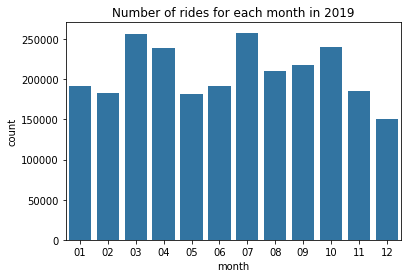

In [26]:
sb.countplot(data=fordgobike_19
             ,x='month'
             ,order=months
             ,color=sb.color_palette()[0]);
plt.title('Number of rides for each month in 2019');

Bar charts of 2017 shows an incomplete data, this could result from program starting time. Despite unestablished user habit, the data decreases from October to November,which shows the same trend to 2018 distribution.

According to 2018 chart, it is obviously ride-count boost during summer (from May to October).

However, 2019 shows a different pattern if we notice the surge in March and April.

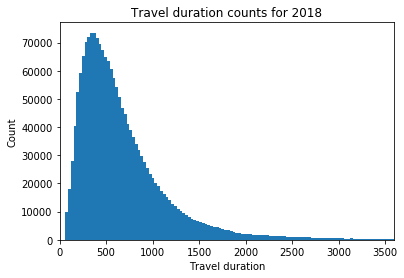

In [27]:
bins_ = np.arange(0,fordgobike_18['duration_sec'].max()+30,30)
plt.hist(x=fordgobike_18['duration_sec']
        , bins=bins_);
# It's obvious there are outliers in dataset, I would set the limit where most data landed first.
plt.xlim(0, 3600);
plt.xlabel('Travel duration');
plt.ylabel('Count');
plt.title('Travel duration counts for 2018');

Travel duration for 2017 has a right tail with the peak around 500s which is between 8 and 9 minutes.

I'll move to the values larger than 3600, one hour, which are the data not included in the above plot.

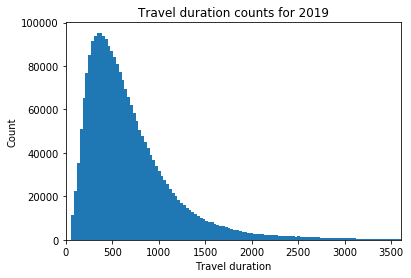

In [28]:
plt.hist(x=fordgobike_19['duration_sec']
        , bins=bins_);
# It's obvious there are outliers in dataset, I would set the limit where most data landed first.
plt.xlim(0, 3600);
plt.xlabel('Travel duration');
plt.ylabel('Count');
plt.title('Travel duration counts for 2019');

Travel duration plot of 2019 shows a similar right-tailed pattern, except it has a higher y limit.

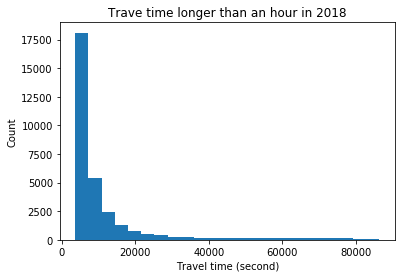

In [29]:
out_ = fordgobike_18[fordgobike_18['duration_sec']>3600]['duration_sec'] #31569

bins_ = np.arange(3600,out_.max()+3600, 3600)
plt.hist(x=out_
        , bins=bins_);
plt.title('Trave time longer than an hour in 2018')
plt.ylabel('Count');
plt.xlabel('Travel time (second)');

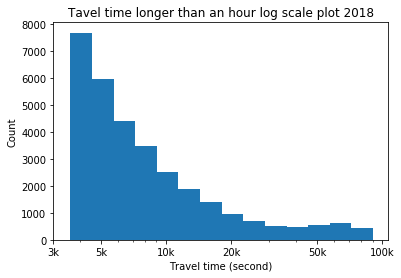

In [30]:
bins_ = 10 ** np.arange(np.log10(3600),np.log10(out_.max())+0.1, 0.1)

plt.hist(x=out_
        , bins=bins_);
plt.xscale('log');
plt.ylabel('Count');
plt.xlabel('Travel time (second)');
plt.xticks([3e3,5e3, 1e4, 2e4, 5e4, 1e5],['3k', '5k', '10k', '20k','50k', '100k']);
plt.title('Tavel time longer than an hour log scale plot 2018');

Travels more than an hour records (31569) in 2018 take up 1.7% of the whole records(1863721). Plot of these records presents a long-tailed distribution. After applying log scale to the travel time (x axis), the distribution still shows a decaying trend with right tail.

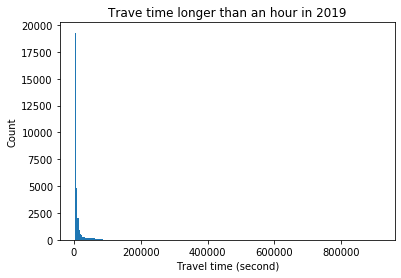

In [31]:
out_19 = fordgobike_19[fordgobike_19['duration_sec']>3600]['duration_sec'] #31569

bins_19 = np.arange(3600,out_19.max()+3600, 3600)
plt.hist(x=out_19
        , bins=bins_19);
plt.title('Trave time longer than an hour in 2019')
plt.ylabel('Count');
plt.xlabel('Travel time (second)');

2019 outlier plot has a sharper peak than 2018, so I will plot a log scale plot for a clearer observation.

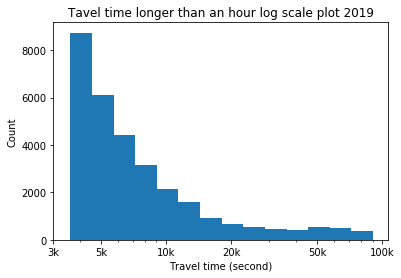

In [32]:
bins_19 = 10 ** np.arange(np.log10(3600),np.log10(out_.max())+0.1, 0.1)

plt.hist(x=out_19
        , bins=bins_19);
plt.xscale('log');
plt.ylabel('Count');
plt.xlabel('Travel time (second)');
plt.xticks([3e3,5e3, 1e4, 2e4, 5e4, 1e5],['3k', '5k', '10k', '20k','50k', '100k']);
plt.title('Tavel time longer than an hour log scale plot 2019');

Travels more than an hour records (30532) in 2018 take up 1.2% of the whole records(2,011,166). Plot of these records presents a long-tailed distribution as well. After applying log scale to the travel time (x axis), the distribution still shows a decaying trend with right tail.

2019 has a more records than 2018 but has a lower long-time(more than an hour) riding records. This could possibly resulted from forgetting to report ending a travel, or big event in 2018 caused the long-time travel. To identify the reason for improving the product, further research is needed.

I'll look at the proportion of records with travel duration longer than an hour and half an hour.

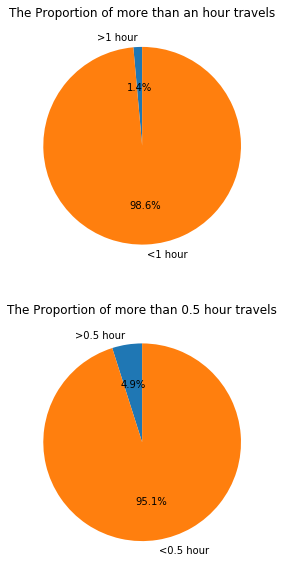

In [33]:
out_18_1 = fordgobike_18[fordgobike_18['duration_sec']>3600].shape[0]
out_19_1 = fordgobike_19[fordgobike_19['duration_sec']>3600].shape[0]

out_18_05 = fordgobike_18[fordgobike_18['duration_sec']>1800].shape[0]
out_19_05 = fordgobike_19[fordgobike_19['duration_sec']>1800].shape[0]

all_18 = fordgobike_18.shape[0]
all_19 = fordgobike_19.shape[0]

out_1 = out_18_1+ out_19_1
short_ = all_18 + all_19 - out_1

out_05 = out_18_05 + out_19_05
short_05 = all_18 + all_19 - out_05 

fig = plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
plt.pie([out_1, short_]
       , labels=['>1 hour', '<1 hour']
       , startangle=90
       , autopct='%1.1f%%'
       );
plt.title('The Proportion of more than an hour travels');

plt.subplot(2,1,2)
plt.pie([out_05, short_05]
       , labels=['>0.5 hour', '<0.5 hour']
       , startangle=90
       , autopct='%1.1f%%'
       );
plt.title('The Proportion of more than 0.5 hour travels');

I'll look at the distribution of user types.

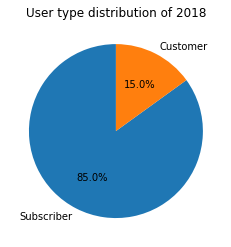

In [34]:
plt.pie(fordgobike_18['user_type'].value_counts()
       , labels=fordgobike_18['user_type'].value_counts().index
       , startangle=90
       , autopct='%1.1f%%');
plt.title('User type distribution of 2018');

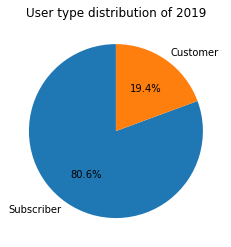

In [35]:
plt.pie(fordgobike_19['user_type'].value_counts()
       , labels=fordgobike_19['user_type'].value_counts().index
       , startangle=90
       , autopct='%1.1f%%');
plt.title('User type distribution of 2019');

It can be seen from these pie charts, majority of the users are subscribers. In 2019 the percentage of customer has increase by 4.4%.

I'll now move onto hourly distribution of travel rides.

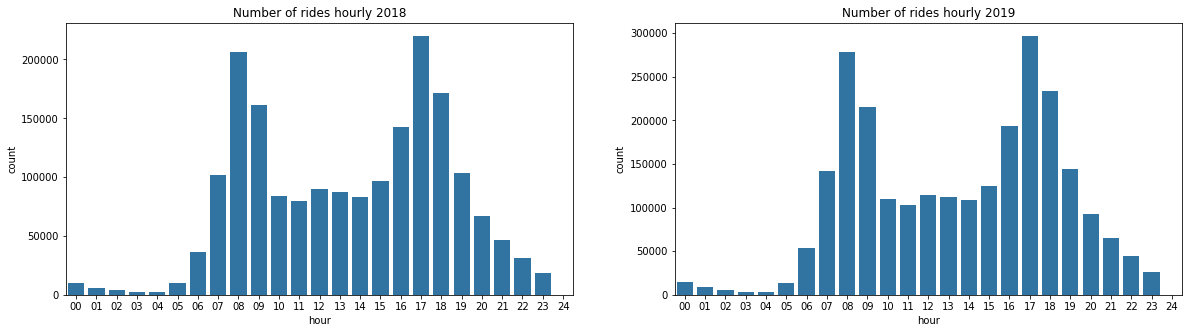

In [57]:
hourly_order =['00', '01', '02', '03', '04', '05', '06', '07', '08', '09'] + [str(i) for i in range(10,25)]

def hourly_plot(data_, x_, order_=hourly_order, color_=sb.color_palette()[0]):
    sb.countplot(data=data_
                , x=x_
                , order=order_
                , color=color_);

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
hourly_plot(fordgobike_18, 'hour')
plt.title('Number of rides hourly 2018');

plt.subplot(1,2,2)
hourly_plot(fordgobike_19, 'hour')
plt.title('Number of rides hourly 2019');

Two plots shows a similar bimodal. There are two peaks, one is at 8 a.m. the other peak at 5 p.m. This is a reasonable case considering these are the rush hours.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>After importing the datasets, the 2017 dataset starts from June, to better observe the data, I concat all the datasets belong to 2018 and 2019 seperately, and then using these two datasets for plotting.

>In both cases, the travel time variable took on a large range of values, but most of the values (99%) are less than 3600s, which means these travels are completed less than an hour. So I zoom in to the x between 0 and 3600.The distribution is right-tailed, with peak at 500s.

>I then plot the rest of the data with log x scale, finding it still exhibits a decaying curve as travel time increases hourly.Despite the similarity of right tailed model, the 2019 data actually shows a lower ratio of rides longer than an hour.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I am interested in the peak hours and months of bike using. So I did some cleaning of creating columns of *month*and *hour*  in both datasets for convinience. I investigated the hourly and monthly distribution of travels, which is a bimodal distribution with peaks at 8 a.m. and 5 p.m.  

## Bivariate Exploration


### For 2018

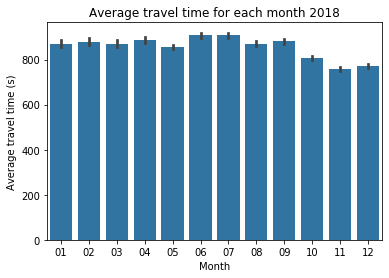

In [38]:
base_color = sb.color_palette()[0]
sb.barplot(data=fordgobike_18
          , x='month'
          , y='duration_sec'
#           , ci='sd'
          , color=base_color
          );
plt.xlabel('Month');
plt.ylabel('Average travel time (s)');
plt.title('Average travel time for each month 2018');

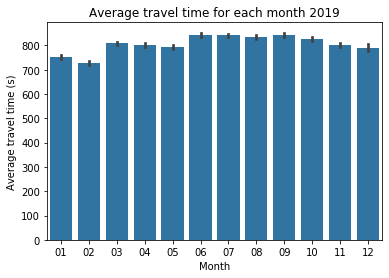

In [39]:
base_color = sb.color_palette()[0]
sb.barplot(data=fordgobike_19
          , x='month'
          , y='duration_sec'
#           , ci='sd'
          , color=base_color);
plt.xlabel('Month');
plt.ylabel('Average travel time (s)');
plt.title('Average travel time for each month 2019');

In these two consecutive years, the average using time for each month does not showing a strong fluctuation.

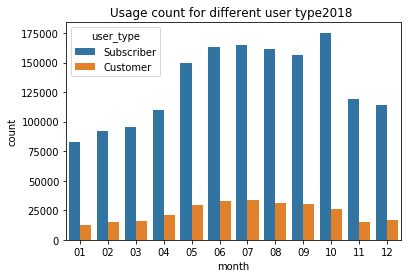

In [52]:
sb.countplot(data=fordgobike_18
            , x='month'
            , hue='user_type');
plt.title('Usage count for different user type2018 ');

In 2018, the trends for subscribers and customers are similar, though the portion of subscribers is much higher than the portion of customers.

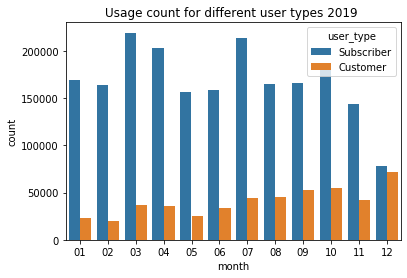

In [51]:
sb.countplot(data=fordgobike_19
            , x='month'
            , hue='user_type');
plt.title('Usage count for different user types 2019 ');

Unlike the similarity of both user types, the trends for different users are different in 2019. 

According to the chart, an intuitive guess is the ratio of subscribers and customers is deccreasing. To see if the guess is true, i'll plot the percentage of subscribers in the following part.

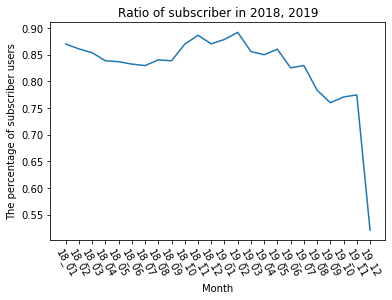

In [42]:
sub_count_18 = fordgobike_18[fordgobike_18['user_type']=='Subscriber'].groupby(by='month').size()
all_count_18 = fordgobike_18.groupby(by='month').size()
sub_count_19 = fordgobike_19[fordgobike_19['user_type']=='Subscriber'].groupby(by='month').size()
all_count_19 = fordgobike_19.groupby(by='month').size()

sub_count_18.index = ['18_'+idx for idx in sub_count_18.index]
sub_count_19.index = ['19_'+idx for idx in sub_count_19.index]

all_count_18.index = sub_count_18.index
all_count_19.index = sub_count_19.index

sub_count = pd.concat([sub_count_18, sub_count_19], axis=0)
all_count = pd.concat([all_count_18, all_count_19], axis=0)


plt.plot(sub_count/all_count);
plt.xticks(rotation=300);
plt.xlabel('Month');
plt.ylabel('The percentage of subscriber users');
plt.title('Ratio of subscriber in 2018, 2019');

From the above plot, it can be observed that the percentage of subscribers is decreasing in general.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The average travel time for 2018 and 2019 doesn't change much. The subscribers take a much higher portion of all users in both years. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Despite more subscriber users, the percentage of subscribers actually decreases in 2019, especially the last two months in 2019.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

I have seen the trend of using counts for different user types, I'll take a look at duration trend for different user types.

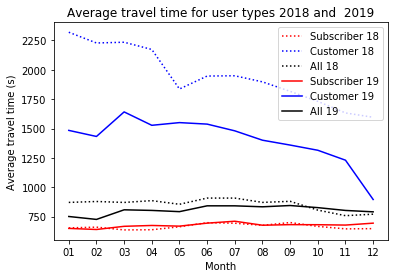

In [43]:
plt.plot(fordgobike_18[fordgobike_18['user_type']=='Subscriber'].groupby('month').mean()['duration_sec'], color='red'
         ,linestyle='dotted', label='Subscriber 18');
plt.plot(fordgobike_18[fordgobike_18['user_type']=='Customer'].groupby('month').mean()['duration_sec'], color='blue'
        ,linestyle='dotted', label='Customer 18');
plt.plot(fordgobike_18.groupby('month').mean()['duration_sec'], color='black'
        ,linestyle='dotted', label='All 18');

plt.plot(fordgobike_19[fordgobike_19['user_type']=='Subscriber'].groupby('month').mean()['duration_sec'], color='red'
        , label='Subscriber 19');
plt.plot(fordgobike_19[fordgobike_19['user_type']=='Customer'].groupby('month').mean()['duration_sec'], color='blue'
        , label='Customer 19');
plt.plot(fordgobike_19.groupby('month').mean()['duration_sec'], color='black'
        , label='All 19');

plt.legend();
plt.xlabel('Month');
plt.ylabel('Average travel time (s)');
plt.title('Average travel time for user types 2018 and  2019');

When we take monthly average travel duration for each year, we can see the following:

a, In both years, the customers average travel duration is much higher than the subscribers'.

b, In both years, the customers average travel duration gradually dropping, which the data of subscribers is relatively stable.

c, 2018 customer average travel time is obviously higher than that of 2019.

I'll then take a look a time duration distribubtion by creating a 2d histgram.

In [45]:
def hist2dim(data_, x_, y_, bins_,cmin_=0.5, cmap_='viridis_r'):
    plt.hist2d(data=data_
              , x=x_
              , y=y_
              , cmin=cmin_
              , bins=bins_
              , cmap=cmap_)
    plt.colorbar();
    plt.xticks([i+0.5 for i in range(0,13)],[str(l) for l in range(0,13)]);
    plt.yticks([600, 1200, 1800, 2400, 3000],[str(n) for n in [600, 1200, 1800, 2400, 3000]]);
    plt.xlim(1,13);
    plt.xlabel('Month');
    plt.ylabel('Travel duration');

C:\Users\HUA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\HUA\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


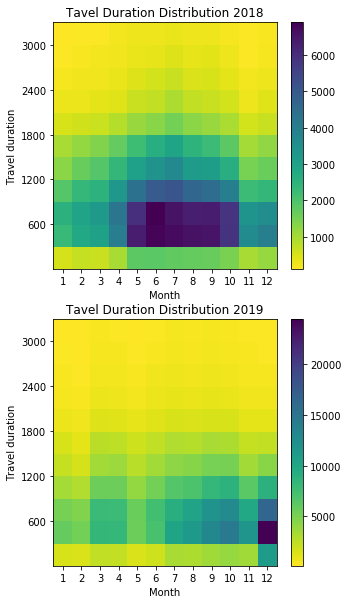

In [50]:
customer_table = fordgobike_18[fordgobike_18['user_type']=='Customer']
subscriber_table = fordgobike_18[fordgobike_18['user_type']=='Customer']
customer_table.index = range(0, customer_table.shape[0])
subscriber_table.index = range(0, subscriber_table.shape[0])
customer_table['month'] = [int(m) for m in customer_table['month']]

bins_c = np.arange(0, 3600,300)
bins_s = np.arange(0, subscriber_table['duration_sec'].max()+3600,3600)
bins_y = np.arange(0, 13+1, 1)

fig = plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
bins_ = [bins_y, bins_c]
hist2dim(customer_table, 'month', 'duration_sec', bins_)
plt.title('Tavel Duration Distribution 2018');


customer_table = fordgobike_19[fordgobike_19['user_type']=='Customer']
subscriber_table = fordgobike_19[fordgobike_19['user_type']=='Customer']
customer_table.index = range(0, customer_table.shape[0])
subscriber_table.index = range(0, subscriber_table.shape[0])
customer_table['month'] = [int(m) for m in customer_table['month']]

bins_c = np.arange(0, 3600,300)
bins_s = np.arange(0, subscriber_table['duration_sec'].max()+3600,3600)
bins_y = np.arange(0, 13+1, 1)

plt.subplot(2,1,2)
bins_= [bins_y, bins_c]
hist2dim(customer_table, 'month', 'duration_sec', bins_)
plt.title('Tavel Duration Distribution 2019');

In the above plot, we could see travel records of 2018 concentrating between May to October with travel time of 5 minutes to 10 minutes, for each square the count can be as large as 6000. This is a reasonable result considering share-bike projects are mostly designed for travel distance longer than 10-minute walk but shorter than 10-minute driving.

The 2019 plot shows a more evenly distribution without many dark squares except the 5-10 minute in December. A noteworthy point is the color bar ticks in 2019 plot is actually much higher than the color bar in 2018 plot. This is understandable due to the finding in the previous analysis that the 2019 has a larger number of records than 2018.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>According to the plots, I did see the using volume concentrates in the rush hours both in the morning and afternoon in two consecutive years. However, the seasonal pattern of 2018 does not work for 2019. This observation could possibly resulted from growth of both the user growth and percentage of one specific user type, customer. Since the customers are not bonded by subscribing contract with the app, their behaviors are more random than the subscribers.

### Were there any interesting or surprising interactions between features?

> I am actually surpriesed the by the number of long-time travels. Riding bike longer than an hour is more like a sport than commute. If the market is large enough, the company should consider starting a project designed for these long-time riders, providing more comfortable bikes with higher charge.

>Another surpring finding is the absence of seasonal flauctuation. I was assuming summer in California stopped some people from using the bikes, but not really.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!